In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf


## Reading data-file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Defining input and target
X = train.drop(columns = ['text', 'reply_to_screen_name', 'hashtags', 'country'], axis = 1)
Y = train['country']
Y = np.where(Y == 'us', 0, 
             np.where(Y == 'uk', 1, 
                      np.where(Y == 'canada', 2, 
                               np.where(Y == 'australia', 3,
                                        np.where(Y == 'ireland', 4, 5)))))

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.2)

## Scaling the data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Defining model 
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, input_dim =  15, activation = 'relu'),
#         tf.keras.layers.Dense(10, input_dim =  15, activation = 'relu'),
        tf.keras.layers.Dense(6, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Fitting model 
history = model.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 6), epochs = 10, batch_size = 32, validation_data = (X_test, tf.keras.utils.to_categorical(Y_test, num_classes = 6)))

In [ ]:
fig = plt.figure(figsize = (12, 8))

## Visualization of accuracy in train and test datasets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.grid()
plt.show()

In [ ]:
test = scaler.fit_transform(test)

In [ ]:
x = model.predict(test)
x = np.argmax(x, axis = 1)
x

In [ ]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
# from xgboost import XGBClassifier

from Help_Funs import count_chars, count_words, count_capital_chars, count_capital_words, count_sent, count_unique_words, count_stopwords, count_hashtags 

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

file_key_1 = 'Covid-tweets/training_data.csv'
file_key_2 = 'Covid-tweets/test_data.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

## Reading data-files
train = pd.read_csv(file_content_stream_1)
test = pd.read_csv(file_content_stream_2)


In [ ]:
test_id = test['Id']

In [ ]:
data_out = pd.DataFrame({'Id': test_id, 'Category': x})
data_out['Category'] = np.where(data_out['Category'] == 0, 'us',
                                np.where(data_out['Category'] == 1, 'uk',
                                         np.where(data_out['Category'] == 2, 'canada',
                                                  np.where(data_out['Category'] == 3, 'australia',
                                                           np.where(data_out['Category'] == 4, 'ireland', 'new_zealand')))))

# data_out.to_csv('LightGBM_submission_md.csv', index = False)

In [ ]:
data_out['Category'].value_counts()

In [ ]:
data_out.to_csv('network_submission_md_1.csv', index = False)

In [ ]:
history = model.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 6), epochs = 10, batch_size = 32, validation_data = (X_test, tf.keras.utils.to_categorical(Y_test, num_classes = 6)))

In [ ]:
X_train.shape

In [ ]:
tf.keras.utils.to_categorical(Y_train, num_classes = 6)

In [ ]:
Y_train

In [ ]:
tf.keras.utils.to_categorical(Y_test, num_classes = 6)

In [ ]:
Y_test

# Experiements

2022-09-07 12:35:03.288224: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-07 12:35:03.288310: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-47-234.ec2.internal): /proc/driver/nvidia/version does not exist
2022-09-07 12:35:03.289023: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.4898 - accuracy: 0.3010 - val_loss: 1.3598 - val_accuracy: 0.3137
Epoch 2/20
1500/1500 [==============================] - 10s 6ms/step - loss: 1.3520 - accuracy: 0.3213 - val_loss: 1.3474 - val_accuracy: 0.3228
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 1.3472 - accuracy: 0.3253 - val_loss: 1.3518 - val_accuracy: 0.3159
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.3447 - accuracy: 0.3308 - val_loss: 1.3538 - val_accuracy: 0.3378
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 1.3428 - accuracy: 0.3381 - val_loss: 1.3467 - val_accuracy: 0.3428
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 1.3400 - accuracy: 0.3376 - val_loss: 1.3394 - val_accuracy: 0.3430
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.3384 - accuracy: 0.3426 - val_loss: 1.3388 - val_accuracy

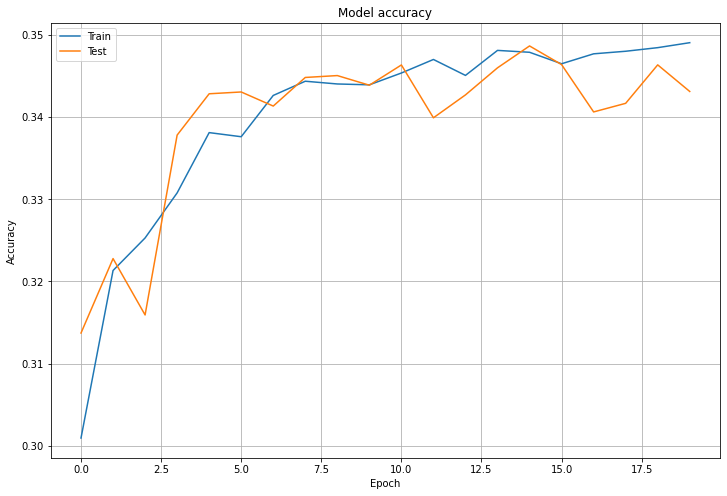

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import tensorflow as tf


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_id = test['Id']
test = test.drop(columns = ['Id', 'text', 'reply_to_screen_name', 'hashtags'], axis = 1)

## Defining input and target
X = train.drop(columns = ['text', 'reply_to_screen_name', 'hashtags', 'country'], axis = 1)
Y = train['country']
Y = np.where(Y == 'us', 0, 
             np.where(Y == 'uk', 1, 
                      np.where(Y == 'canada', 2, 
                               np.where(Y == 'australia', 3,
                                        np.where(Y == 'ireland', 4, 5)))))

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.2)

## Scaling the data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
test = scaler.fit_transform(test)

## Defining model 
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, input_dim =  15, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'relu'),
        tf.keras.layers.Dense(6, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Fitting model 
history = model.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 6), epochs = 20, batch_size = 32, validation_data = (X_test, tf.keras.utils.to_categorical(Y_test, num_classes = 6)))

fig = plt.figure(figsize = (12, 8))

## Visualization of accuracy in train and test datasets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.grid()
plt.show()

In [2]:
## Predicting on test
nn_pred = model.predict(test)
nn_pred = np.argmax(nn_pred, axis = 1)

## Defining data to be exported
data_out = pd.DataFrame({'Id': test_id, 'Category': nn_pred})
data_out['Category'] = np.where(data_out['Category'] == 0, 'us',
                                np.where(data_out['Category'] == 1, 'uk',
                                         np.where(data_out['Category'] == 2, 'canada',
                                                  np.where(data_out['Category'] == 3, 'australia',
                                                           np.where(data_out['Category'] == 4, 'ireland', 'new_zealand')))))
data_out.to_csv('nn_submission_md2.csv', index = False)